This is Bryan Allen's submission for IDB10's Final Porfolio for skills of Python-Jupyter-Pandas-GitHub programming. It is based on a popular database of nutrition data from McD's Menu Items in India! There are three Q's I am curious to know and will attempt to answer using data manipulation:
<br/><br/>1.) Which item(s) have the most sugar and/or the HIGHEST ratio of sugar to serving size?
<br/>2.) What is the most unhealthy item on the Menu(I.E. Which item(s) contain the most fat? 
<br/>3.) Which item(s) have the most sodium and/or the HIGHEST ratio of sodium to serving size?
<br/><br/>I hope that some these insights can help our programmer friends on Indian sub-continent make healthy choices for themselves and for their familes, so that they can responsibly enjoy these unique Indian-American treats. Who knows, maybe some of them will choose to work with McDs in the future.

<a class="anchor" id="table_contents"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Table of Contents</span></h2>

* [Section 1: Importing Necessary Libraries and Data](#section1)
* [Section 2: Previewing Data](#section2)
* [Section 3: Data Cleaning](#section3)
* [Section 4: Question #1 Danger of Sugar](#section4)
* [Section 5: Question #2 Danger of Fat](#section5)
* [Section 6: Question #3 Danger of Sodium](#section6)
* [Section 7: Building the Model](#section7)
* [Section 8: Testing Custom Data](#section8)

<a class="anchor" id="section1"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Importing Necessary Libraries and Data</span></h2>

In [178]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt

A NOTE ON NAMING CONVENTIONS: My project limits use of aliases, since I am owner of this Notebook. I'm aware that on teams the standard naming convention is to create abbreviated aliases, and so when I'm on those teams I'll defer to their conventions, but if the project is mine I will name the modules whatever looks the coolest.

Some programmers have asked why I do this; aliases make everything kinda look the same to me to force me to strain looking at them, the same when I look at red on green background, so maybe it's a disconnect between the brain and the eye (indeed I do have a touch of that type of color blindness). But the simple answer is that python code is fun to type, and it's beautiful to look at, for me anyway. Why would I want cover that up?
<br /><br />
Bryan Allen, apprentice Data Engineer<br />
Lusaka Zambia August 2022


In [179]:
dataframe = pandas.read_csv('India_Menu.csv')

<a class="anchor" id="section2"></a>
<h2 style="color: #808080; background-color:#808080; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Previewing Data</span></h2>
<br/>Taking a look at the head and tail of our DB can quickly give us an idea how long and how wide is the DB we're working with. Also we'll get rough idea how much cleaning our data will require.

In [180]:
print(dataframe.head(2))
print(dataframe.tail(2))

  Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
0  Regular Menu      McVeggie™ Burger          168 g         402.05   
1  Regular Menu  McAloo Tikki Burger®          146 g         339.52   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   

   Total carbohydrate (g)  Total Sugars (g)  Added Sugars (g)  Sodium (mg)  
0                   56.54              7.90              4.49       706.13  
1                   50.27              7.05              4.07       545.34  
       Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
139  Condiments Menu            Sweet Corn           40 g          45.08   
140  Condiments Menu  Mixed Fruit Beverage         180 ml          72.25   

     Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  \
139         1.47      

In [181]:
item_count = dataframe['Menu Items'].count()
print("There are", item_count, "items in the dataframe")
print()
print("While we're at it let's go ahead take look at our column headers as a list")
list(dataframe.columns)

There are 141 items in the dataframe

While we're at it let's go ahead take look at our column headers as a list


['Menu Category',
 'Menu Items',
 'Per Serve Size',
 'Energy (kCal)',
 'Protein (g)',
 'Total fat (g)',
 'Sat Fat (g)',
 'Trans fat (g)',
 'Cholesterols (mg)',
 'Total carbohydrate (g)',
 'Total Sugars (g)',
 'Added Sugars (g)',
 'Sodium (mg)']

There are 7 unique categories of menu items. Let's take look at them:
McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu Category, dtype: int64
Hey, this looks like good opportunity create a Histogram! Let's visualize the dispersion of these categories


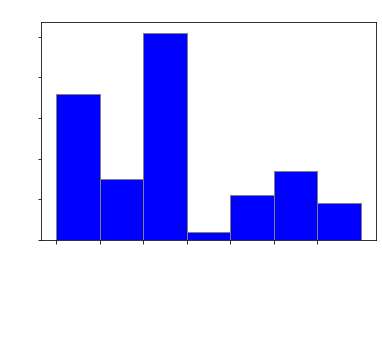

In [182]:
num_unique_cats = dataframe["Menu Category"].nunique()
print("There are", num_unique_cats,"unique categories of menu items. Let's take look at them:")
menu_cat_values = (dataframe["Menu Category"].value_counts())
print(menu_cat_values)
print("Hey, this looks like good opportunity create a Histogram! Let's visualize the dispersion of these categories")
bins=[0,1,2,3,4,5,6,7]
plt.hist(dataframe['Menu Category'], bins=bins, facecolor='blue', edgecolor='gray', rwidth=1, align='mid')
## plt.tight_layout()
plt.title("Dispersion of Menu Categories", fontweight ="bold", color ="white")
plt.xlabel("Number menu items in category", fontweight ="bold", color ="white")
plt.ylabel("Menu Categories", fontweight ="bold", color ="white")
plt.xticks(color ="white", rotation = 45)
plt.yticks(fontsize= 10, color ="white")
plt.show()

[Return to Top: Table of Contents](#table_contents)
<a class="anchor" id="section3"></a>
<h2 style="color:#808080; background-color:#808080; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Data Cleaning</span></h2>
<br/>
Cleaning requires the skill of a detective and the creativity of a seasoned programmer. One learns all kinds of neat tricks and builds out his/her utility belt of tools. So let's not be afraid get our hands dirty, this part is fun!

In [183]:
pandas.set_option('display.max_colwidth', 25) ## constrains output length of cell value

In [184]:
for col in list(dataframe.columns):
    dataframe[col] = dataframe[col].astype(str).str.replace(u"\u2122",'')
for col in list(dataframe.columns):
    dataframe[col] = dataframe[col].astype(str).str.replace("®",'')    

Some of the cell values have special characters that need to be stripped out in order convert them from object to string type data.

In [185]:
for i in range(len(dataframe['Per Serve Size'])):
    curr_cell = dataframe['Per Serve Size'][i]
    curr_cell = curr_cell.split(' ')
    dataframe['Per Serve Size'][i] = curr_cell[0]
    i += 1

When splitting values contained within the serving size we can see if the menu item is a drink or a food by observing whether it is measured in grams or mililiters. This distinction will be critical later in our observations.
<br/><br/>
Check out this conversion machine! It's takes an objects as input and spits them out as the desired float data type

In [186]:
print("Total Sugars starts as type:", dataframe['Total Sugars (g)'].dtype)
print("Serve Size starts as type:", dataframe['Per Serve Size'].dtype)
print("Total fat starts as type:", dataframe['Total fat (g)'].dtype)
print("Total Sodium starts as type:", dataframe['Sodium (mg)'].dtype)
print("> " * 11,"Making","> " * 11)
print("< " * 10,"Conversion","< " * 10)
dataframe['Per Serve Size'] = dataframe['Per Serve Size'].astype(float)
dataframe['Total Sugars (g)'] = dataframe['Total Sugars (g)'].astype(float)
dataframe['Total fat (g)'] = dataframe['Total fat (g)'].astype(float)
dataframe['Sodium (mg)'] = dataframe['Sodium (mg)'].astype(float)
print("Column Total Sugars has been converted to type:",dataframe['Total Sugars (g)'].dtype)
print("Column Serve Size has been converted to type:",dataframe['Per Serve Size'].dtype)
print("Column Total fat has been converted to type:",dataframe['Total fat (g)'].dtype)
print("Column Total Sodium has been converted to type:",dataframe['Sodium (mg)'].dtype)

Total Sugars starts as type: object
Serve Size starts as type: object
Total fat starts as type: object
Total Sodium starts as type: object
> > > > > > > > > > >  Making > > > > > > > > > > > 
< < < < < < < < < <  Conversion < < < < < < < < < < 
Column Total Sugars has been converted to type: float64
Column Serve Size has been converted to type: float64
Column Total fat has been converted to type: float64
Column Total Sodium has been converted to type: float64


In [187]:
## print(dataframe.head(5))

[Return to Top: Table of Contents](#table_contents)
<a class="anchor" id="section4"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Question #1 Danger of Sugar</span></h2>

<br/>What item has HIGHEST ratio of sugar to serving size?
In order try answer this Q I will utilize a scatterplot, with serving
size for x-axis and sugars on the y-axis. Later I will do some arithmetic
to calculate the respecive ratios but first let's visualize that data!

In [188]:
dataframe['grams sugar/mL'] = round(dataframe['Total Sugars (g)'] / dataframe['Per Serve Size'] * 100, 2)
soda_df = dataframe[['Menu Category','Menu Items','Total Sugars (g)', 'Per Serve Size', 'grams sugar/mL']]
coffee_df = dataframe[['Menu Category','Menu Items','Total Sugars (g)', 'Per Serve Size', 'grams sugar/mL']]
soda_df = soda_df.loc[soda_df['Menu Category'] == ('Beverages Menu')]
coffee_df = coffee_df.loc[coffee_df['Menu Category'] == ('McCafe Menu')]
beverage_df = pandas.concat([soda_df, coffee_df], axis=1)

Now that we've created our dataframes let's create a scatterplot. Perhaps a few items will pop out at us.

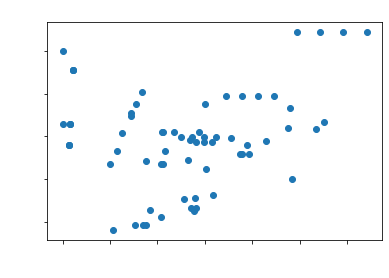

In [189]:
x = numpy.array(beverage_df['Total Sugars (g)'])
y = numpy.array(beverage_df['Per Serve Size'])
plt.scatter(x, y)
plt.title("Gimme some Sugar!", fontweight ="bold", color ="white")
plt.xlabel("Total Sugars in grams", fontweight ="bold", color ="white")
plt.ylabel("Serving Size in mL", fontweight ="bold", color ="white")
plt.xticks(fontsize= 10, color ="white")
plt.yticks(fontsize= 10, color ="white")
plt.show()


Now that we've visualized them let's create tables to see the worst offenders

In [190]:
coffee_df.reset_index(drop=True, inplace=True)
soda_df.reset_index(drop=False, inplace=True)
beverage_df_print = pandas.concat([soda_df, coffee_df], axis=0, ignore_index=True)
beverage_df_print = beverage_df_print[['Menu Items','Total Sugars (g)', 'Per Serve Size', 'grams sugar/mL']]
## beverage_df_print = beverage_df_print.sort_values(by="Total Sugars (g)", ascending=False, na_position='first', inplace=True)
beverage_df_print.sort_values(by='Total Sugars (g)', ascending=False, na_position='first', inplace=True)
beverage_df_print = beverage_df_print.reset_index(drop=True, inplace=False)
print(beverage_df_print.head(5))

               Menu Items  Total Sugars (g)  Per Serve Size  grams sugar/mL
0      Large Fanta Oragne             64.22           544.0           11.81
1            Large Sprite             59.28           544.0           10.90
2   Chocolate Oreo Frappe             55.14           334.0           16.51
3         Large Coca-Cola             54.34           544.0            9.99
4  American Mud Pie Shake             53.40           317.0           16.85


In [191]:
coffee_df.reset_index(drop=True, inplace=True)
soda_df.reset_index(drop=False, inplace=True)
beverage_df_print = pandas.concat([soda_df, coffee_df], axis=0, ignore_index=True)
beverage_df_print = beverage_df_print[['Menu Items','Total Sugars (g)', 'Per Serve Size', 'grams sugar/mL']]
## beverage_df_print = beverage_df_print.sort_values(by="Total Sugars (g)", ascending=False, na_position='first', inplace=True)
beverage_df_print.sort_values(by='grams sugar/mL', ascending=False, na_position='first', inplace=True)
beverage_df_print = beverage_df_print.reset_index(drop=True, inplace=False)
print(beverage_df_print.head(5))

                 Menu Items  Total Sugars (g)  Per Serve Size  grams sugar/mL
0        Medium Blackforest             48.45          200.08           24.22
1       Regular Blackforest             27.79          125.79           22.09
2  Medium Soft Serve: St...             28.20          132.08           21.35
3  Medium Soft Serve: Ho...             27.01          132.08           20.45
4  Double Dark Hot Choco...             31.81          163.00           19.52


So even tho we see the drinks that contain the highest sugars are the usual offenders like large size Fanta and Coco-Cola we should advise our friends to also be selective with some of the McCafe hot drinks for they seem to be the sweetest beverages most saturated in sweeteners.

[Return to Top: Table of Contents](#table_contents)
<a class="anchor" id="section5"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Question #2 Danger of Fat</span></h2>

<br/> As living standards on Indian sub-continent rise so too are peoples waistlines. Whereas our first set of questions could arm consumers against threat of Diabetes, this second set of questions will help our friends make informed choices to protect themselves against the rising threat of obesity.

In [192]:
dataframe['Fat (%)'] = round(dataframe['Total fat (g)'] / dataframe['Per Serve Size'] * 100, 2)
breakfast_df = dataframe[['Menu Category','Menu Items','Total fat (g)', 'Per Serve Size', 'Fat (%)']]
breakfast_df = breakfast_df.loc[breakfast_df['Menu Category'] == ('Breakfast Menu')]
breakfast_df = breakfast_df.iloc[:-7,] ## removes coffee drinks
lunch_df = dataframe[['Menu Category','Menu Items','Total fat (g)', 'Per Serve Size', 'Fat (%)']]
lunch_df = lunch_df.loc[lunch_df['Menu Category'] == ('Regular Menu')]
fatty_df = pandas.concat([breakfast_df, lunch_df], axis=0, ignore_index=True)
print(len(fatty_df), "Items in fatty_df")

44 Items in fatty_df


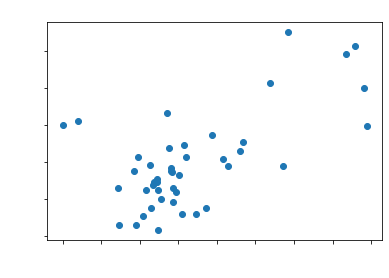

In [193]:
x = numpy.array(fatty_df['Total fat (g)'])
y = numpy.array(fatty_df['Per Serve Size'])
plt.scatter(x, y)
plt.title("Fat is Beautiful?", fontweight ="bold", color ="white")
plt.xlabel("Total Fat in grams", fontweight ="bold", color ="white")
plt.ylabel("Serving Size in grams", fontweight ="bold", color ="white")
plt.xticks(fontsize= 10, color ="white")
plt.yticks(fontsize= 10, color ="white")
plt.show()

In [194]:
fatty_df.reset_index(drop=True, inplace=False) ## prints len of 8 items
# print(len(fatty_df), "Items in fatty_df") ## outputs 44 items
fatty_df.reset_index(drop=True, inplace=False) ## prints len of 36 items
# print(len(fatty_df), "Items in fatty_df") ## outputs 44 items
fatty_print_df = fatty_df.drop(['Menu Category'], axis=1, inplace=False)
# print(len(fatty_print_df), "Items in fatty_df") ## outputs 44 items

fatty_print_df.sort_values(by='Total fat (g)', ascending=False, na_position='first', inplace=True)
fatty_print_df = fatty_print_df.reset_index(drop=True, inplace=False)
print(fatty_print_df.head(5))

                 Menu Items  Total fat (g)  Per Serve Size  Fat (%)
0     McSpicy Paneer Burger          39.45           199.0    19.82
1         Spicy Paneer Wrap          39.10           250.0    15.64
2          Veg Maharaja Mac          37.94           306.0    12.40
3      Chicken Maharaja Mac          36.69           296.0    12.40
4  Ghee Rice with Mc Spi...          29.20           325.0     8.98


Above and below we can see the fattiest foods on the menu, both in aggregate and as percentage of serving size. One suriprising find above the veggie version of the "Maharaja Mac" actually contains more grams of fat than the Chicken version, who knew? From this we can also encourage consumers to look carefully into what's actually contained in their foods.

In [195]:
fatty_print_df.sort_values(by='Fat (%)', ascending=False, na_position='first', inplace=True)
fatty_print_df = fatty_print_df.reset_index(drop=True, inplace=False)
print(fatty_print_df.head(5))

                 Menu Items  Total fat (g)  Per Serve Size  Fat (%)
0  Double Chocochips Muffin          17.28            80.0    21.60
1    3 piece Chicken Strips          18.57            87.0    21.34
2    2 piece Chicken Strips          12.38            58.0    21.34
3     McSpicy Paneer Burger          39.45           199.0    19.82
4    5 piece Chicken Strips          28.54           145.0    19.68


[Return to Top: Table of Contents](#table_contents)
<a class="anchor" id="section6"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Question #3 Danger of Sodium</span></h2>

<br/> Finally we'll take a look at an aspect of our food that could be uniquely dangerous: Sodium. Eating too much salty foods has been linked to a variety of illnesses like hyptertension and heart problems, especially when combined with a stressful lifestyle.

In [196]:
dataframe['Sodium (%)'] = round(dataframe['Sodium (mg)'] / dataframe['Per Serve Size'] / 10, 2)
salty_lunch_df = dataframe[['Menu Category','Menu Items','Sodium (mg)', 'Per Serve Size', 'Sodium (%)']]
salty_lunch_df = salty_lunch_df.loc[salty_lunch_df['Menu Category'] == ('Regular Menu')]
salty_lunch_df = salty_lunch_df.iloc[:-4,]
salty_breakfast_df = dataframe[['Menu Category','Menu Items','Sodium (mg)', 'Per Serve Size', 'Sodium (%)']]
salty_breakfast_df = salty_breakfast_df.loc[salty_breakfast_df['Menu Category'] == ('Breakfast Menu')]
salty_breakfast_df = salty_breakfast_df.iloc[:-7,]
salty_print_df = pandas.concat([salty_breakfast_df, salty_lunch_df], axis=0, ignore_index=True)

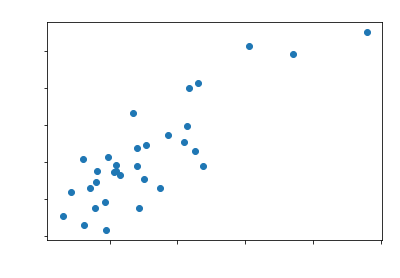

In [197]:
x = numpy.array(salty_lunch_df['Sodium (mg)'])
y = numpy.array(salty_lunch_df['Per Serve Size'])
plt.scatter(x, y)
plt.title("Some fries with your salt?", fontweight="bold", color="white")
plt.xlabel("Total Sodium in mgs", fontweight="bold", color="white")
plt.ylabel("Serving Size in grams", fontweight="bold", color="white")
plt.xticks(fontsize=10, color="white")
plt.yticks(fontsize=10, color="white")
plt.show()

Let's find the top five dishes that contain the highest Sodium totals

In [198]:
salty_breakfast_df = salty_breakfast_df.reset_index(drop=True, inplace=False)
salty_lunch_df = salty_lunch_df.reset_index(drop=True, inplace=False)
salty_print_df = salty_print_df.drop(['Menu Category'], axis=1)
salty_print_df.sort_values(by='Sodium (mg)', ascending=False, na_position='first', inplace=True)
salty_print_df = salty_print_df.reset_index(drop=True, inplace=False)
print(salty_print_df.head(5))

                 Menu Items  Sodium (mg)  Per Serve Size  Sodium (%)
0  Ghee Rice with Mc Spi...      2399.49           325.0        0.74
1      Chicken Maharaja Mac      1854.71           296.0        0.63
2          Veg Maharaja Mac      1529.22           306.0        0.50
3    5 piece Chicken Strips      1193.05           145.0        0.82
4        Spicy Chicken Wrap      1152.38           257.0        0.45


Take look above at the "Maharaja Macs" I was pointing out earlier and we can see the chicken version contain's 25% more sodium than the veggie version.
Also note the Ghee Rice dish, even tho it sounds tasty and that the serving size is eight percent larger than the chicken Maharaja Mac it also contains a whopping thirty percent more sodium. 

<bf/>In fact this might be a good moment take a quick sidetrip step away from the tables to take look at the serving sizes. Keeping an eye on serving sizes could help consumers stay trim and fit. Let's create a visual.

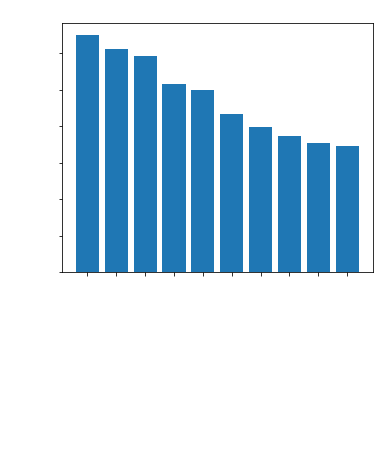

In [236]:
serve_size_df = dataframe.loc[dataframe['Menu Category'] == ('Regular Menu')]
serve_size_df = serve_size_df.loc[serve_size_df['Menu Items'] != ('L1 Coffee with milk')]
serve_size_df = serve_size_df.loc[serve_size_df['Menu Items'] != ('L1 Coffee')] # don't care about bev's
serve_size_df = serve_size_df.iloc[:-24,] ## removes all but the top-ten
## print(len(bkfast_serve_size_df))
serve_size_df.sort_values(by='Per Serve Size', ascending=False, na_position='first', inplace=True)
serve_size_df = serve_size_df.reset_index(drop=True, inplace=False)
serve_size_df = serve_size_df[['Menu Items', 'Per Serve Size']]
## plt.hist(serve_size_df['Per Serve Size'], bins=bins, facecolor='blue', edgecolor='gray', rwidth=1, align='mid')
y = numpy.array(serve_size_df['Per Serve Size'])
x = numpy.array(serve_size_df['Menu Items'])
plt.bar(x,y)
plt.tight_layout()
plt.title("Serving Sizes ranked from Top", fontweight ="bold", color ="white")
plt.xlabel("Rank", fontweight ="bold", color ="white")
plt.ylabel("Serving Size in grams", fontweight ="bold", color ="white")
plt.xticks(color ="white", rotation = 45)
plt.yticks(fontsize= 10, color ="white")
plt.show()

As the has noticed

So even tho these chicken strips sound mighty tasty Indian consumers should definately consider limiting their intake of these items for they indeed are the saltiest items on the entire menu.
<br/><br/>
[Return to Top: Table of Contents](#table_contents)